<a href="https://colab.research.google.com/github/Gcango/Dados_Economicos/blob/main/Renda_percapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de um conjunto de dados Economicos do Brasil. Formação de analise de dados de Odemir Depieri Jr & Ronisson Lucas Calmon da Conceição. Nesta analise foram apreciadas as questões como A renda capita, que é um dos indicadores socioeconômicos que avaliam o grau de desenvolvimento econômico de um determinado lugar. A média é obtida através da divisão do Produto Nacional Bruto (PNB) pelo número total de habitantes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel("/content/Dados_Pib.xlsx")

In [3]:
dados.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [ ]:
#1) - Explorando os dados do Dataset

In [4]:
print("O dataset tem linhas: ", dados.shape[0])
print("O dataset tem Colunas: ", dados.shape[1])

O dataset tem linhas:  112
O dataset tem Colunas:  3


In [5]:
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  112 non-null    object 
 1   Ano                112 non-null    int64  
 2   PIB per capita     112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5 KB


In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,112.0,2014.500000,1.123059,2013.00,2013.7500,2014.50,2015.2500,2016.00
PIB per capita,112.0,18.367411,9.481273,8.14,11.6475,14.85,23.7275,54.48


In [7]:
dados.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 3 entries, Territorialidades to PIB per capita
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [8]:
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

Territorialidades: Number of unique values 28
Ano: Number of unique values 4
PIB per capita: Number of unique values 108


In [ ]:
#2) - Organizando o dataset por media do PIB em cada estado nos difrentes anos.

In [9]:
dados.groupby(by=['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

In [ ]:
#3) - Projectando Graficamente o resultado da nova organização do Dataset

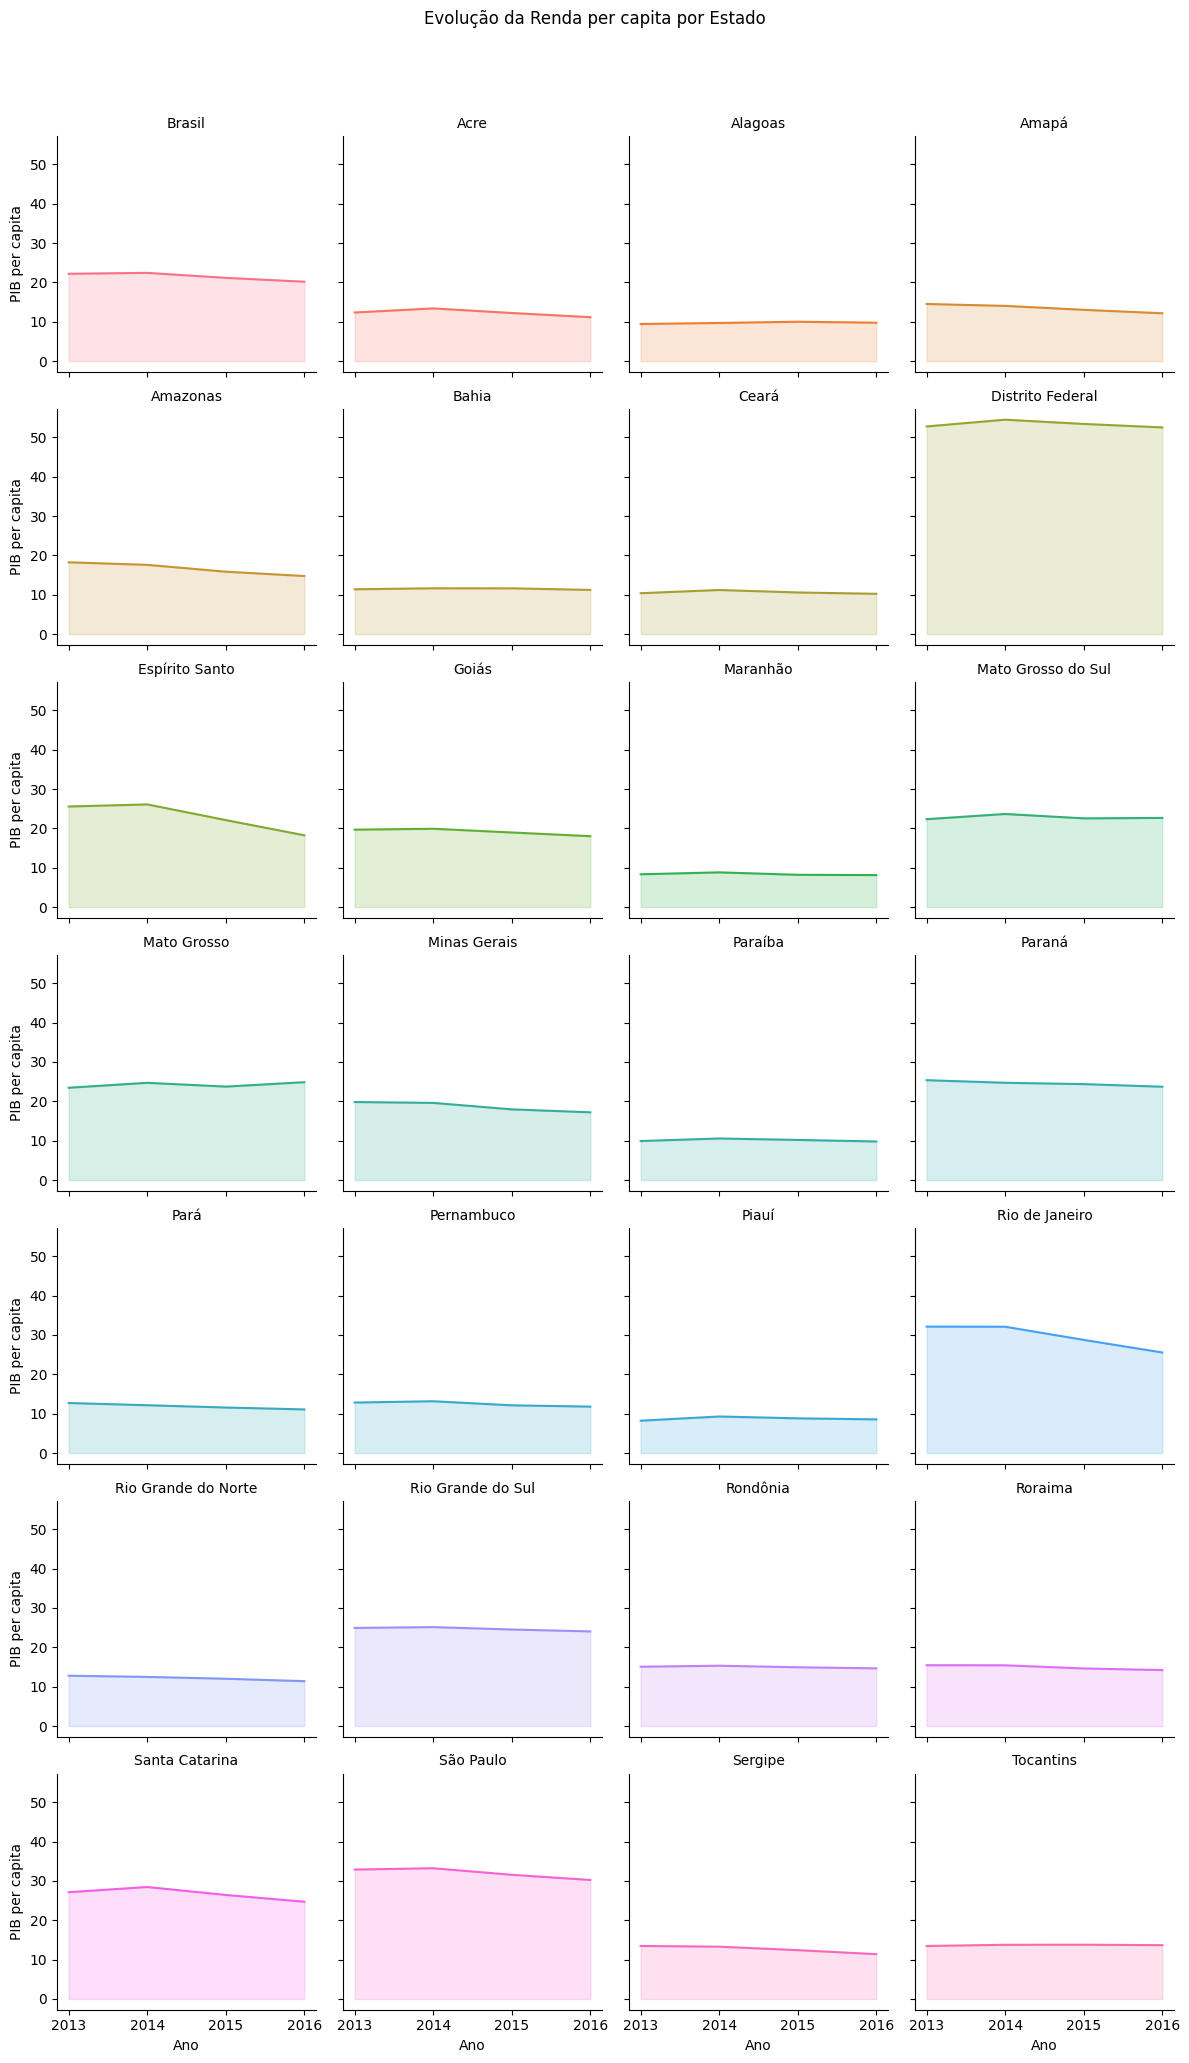

In [12]:
fundo = '#f5f5f5'

grafico = sns.FacetGrid(dados, col='Territorialidades', hue='Territorialidades', col_wrap=4)
grafico = grafico.map(plt.plot, 'Ano', 'PIB per capita')
grafico = grafico.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')
grafico = grafico.set_titles('{col_name}')
grafico = grafico.fig.suptitle('Evolução da Renda per capita por Estado')
plt.subplots_adjust(top=0.92)